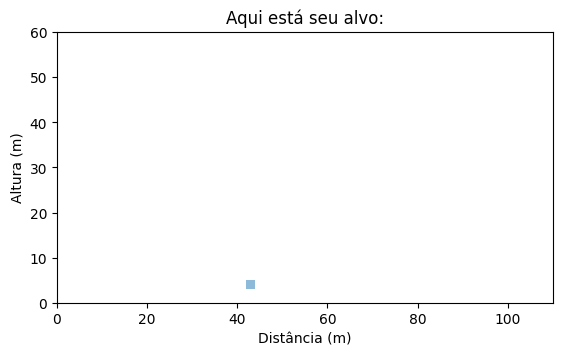

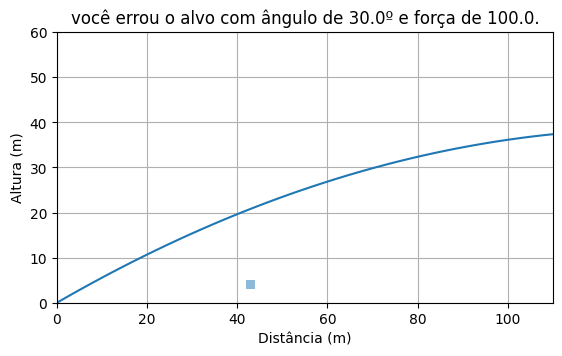

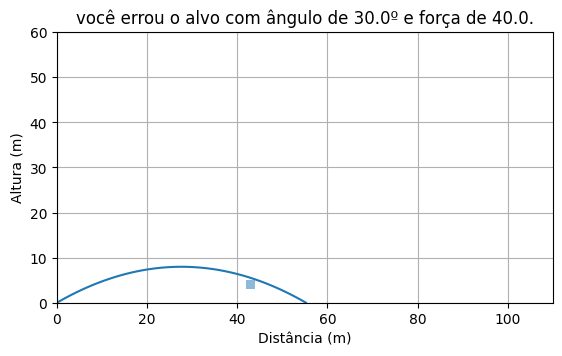

ValueError: could not convert string to float: ''

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

#gerador de alvo
p1x = random.randint(10,100) #atribui um numero aleatório para ser a posição no eixo x do canto inferior esquerdo do alvo
p1y = random.randint(0,5) #atribui um numero aleatório para ser a posição no eixo y do canto inferior esquerdo do alvo
#gera as coordenadas dos vértices do alvo de 2m/2m a partir das coordenadas geradas aleatoriamente
alvo = np.array([[p1x,p1y], [p1x+2,p1y ], [p1x+2, p1y+2], [p1x, p1y+2]]) 


 
 
# Mostra a figura
plt.title("Aqui está seu alvo:")
plt.axis("Scaled")
plt.axis([0, 110, 0, 60])
plt.fill(*alvo.T, alpha=0.5)
plt.xlabel('Distância (m)')
plt.ylabel('Altura (m)')
plt.show()

#-------------------------------------------------------------------------------------------
acerto=False
while (acerto==False):
    #Dados de lançamento
    angle_degrees =float(input("Qual o ângulo do lançamento?"))  # Ângulo de lançamento em graus
    strength = float(input("Qual a força do lançamento, de 0 a 100?"))  # Força de lançamento
    velocity = 50*(0.10+(strength/100))

    #Converter o ângulo para radianos
    angle_radians = np.radians(angle_degrees)

    #Componentes da velocidade inicial
    v0x = velocity * np.cos(angle_radians)
    v0y = velocity * np.sin(angle_radians)

    #Parâmetros da trajetória
    g = 9.8  # Aceleração devida à gravidade (m/s^2)
    t_total = (2 * v0y) / g  # Tempo total de voo

    #Vetor de tempo
    t = np.linspace(0, t_total, num=100)


    #Calcular as posições
    x = v0x * t
    y = v0y * t - 0.5 * g * t**2

    #para cada momento do tempo calculado
    for i in t:
        acerto = False
        #verifica posição do projétil
        posx = v0x * i
        posy = v0y * i - 0.5 * g * i**2
        #verifica se o projétil esta dentro do alvo
        if (posx>=p1x and posx<=p1x+2):
            if(posy>=p1y and posy<=p1y+2):
                plt.plot(posx,posy, "ro")
                acerto = True
                break


    if (acerto)==False:

        plt.title('você errou o alvo com ângulo de '+str(angle_degrees)+"º e força de "+str(strength)+".")
    else:
        plt.title('você acertou o alvo com ângulo de '+str(angle_degrees)+"º e força de "+str(strength)+".")

    #Plotar a trajetória com o alvo
    plt.axis("Scaled")
    plt.axis([0, 110, 0, 60])
    plt.plot(x, y)
    plt.fill(*alvo.T, alpha=0.5)
    plt.xlabel('Distância (m)')
    plt.ylabel('Altura (m)')

    plt.grid(True)
    plt.show()
